# Clustering Crypto

In [154]:
# Initial imports
import pandas as pd
import hvplot.pandas
from path import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


### Deliverable 1: Preprocessing the Data for PCA

In [155]:
# Load the crypto_data.csv dataset.
file_path = "crypto_data.csv"
crypto_df = pd.read_csv(file_path, index_col=0)
crypto_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [156]:
# Keep all the cryptocurrencies that are being traded.
# Notes: https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression
crypto_df = crypto_df.drop(crypto_df[crypto_df.IsTrading == False].index)

In [157]:
crypto_df.shape

(1144, 6)

In [158]:
crypto_df.dtypes

CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [159]:
# Keep all the cryptocurrencies that have a working algorithm.
crypto_df = crypto_df[crypto_df['Algorithm'] != 0]
crypto_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [160]:
# Remove the "IsTrading" column. 
crypto_df = crypto_df.drop(columns="IsTrading")
crypto_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
SERO,Super Zero,Ethash,PoW,NaN,1000000000
UOS,UOS,SHA-256,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [161]:
# Remove rows that have at least 1 null value.
crypto_df = crypto_df.dropna()
crypto_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,3.14159E+11
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [162]:
# Keep the rows where coins are mined.
crypto_df = crypto_df.drop(crypto_df[crypto_df.TotalCoinsMined == 0].index)
crypto_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,3.14159E+11
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [163]:
# Create a new DataFrame that holds only the cryptocurrencies names.
crypto_name_df = crypto_df[['CoinName']]
crypto_name_df

,CoinName
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum
...,...
ZEPH,ZEPHYR
GAP,Gapcoin
BDX,Beldex
ZEN,Horizen


In [164]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm.
crypto_df = crypto_df.drop(columns="CoinName")
crypto_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,3.14159E+11
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Equihash,PoW,7.296538e+06,21000000


In [165]:
# Convert TotalCoinSupply to numeric
crypto_df["TotalCoinSupply"] = pd.to_numeric(crypto_df["TotalCoinSupply"])
crypto_df.dtypes


Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply    float64
dtype: object

In [166]:
# Use get_dummies() to create variables for text features.
X = pd.get_dummies(crypto_df)
X

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,3.141590e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2.000000e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,2.500000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1.400223e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEN,7.296538e+06,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [167]:
# Standardize the data with StandardScaler().
crypto_scaled = StandardScaler().fit_transform(X)
crypto_scaled[0:2]

array([[-0.11674787, -0.15286467, -0.0433555 , -0.0433555 , -0.0433555 ,
        -0.06137164, -0.07523548, -0.0433555 , -0.06137164, -0.06137164,
        -0.0433555 , -0.0433555 , -0.19226279, -0.06137164, -0.09731237,
        -0.0433555 , -0.11536024, -0.07523548, -0.0433555 , -0.0433555 ,
        -0.15176505, -0.0433555 , -0.13105561, -0.0433555 , -0.0433555 ,
        -0.08695652, -0.0433555 , -0.0433555 , -0.0433555 , -0.0433555 ,
        -0.06137164, -0.0433555 , -0.08695652, -0.08695652, -0.08695652,
        -0.0433555 , -0.13105561, -0.13827675, -0.13827675, -0.0433555 ,
        -0.06137164, -0.0433555 , -0.07523548, -0.1815096 , -0.0433555 ,
        -0.0433555 , -0.0433555 , -0.07523548, -0.15811388, -0.3145935 ,
        -0.0433555 , -0.08695652, -0.07523548, -0.06137164, -0.0433555 ,
         1.38873015, -0.0433555 , -0.0433555 , -0.06137164, -0.0433555 ,
        -0.0433555 , -0.0433555 , -0.0433555 , -0.0433555 , -0.0433555 ,
        -0.0433555 , -0.0433555 , -0.39836623, -0.0

### Deliverable 2: Reducing Data Dimensions Using PCA

In [168]:
# Using PCA to reduce dimension to three principal components.
pca = PCA(n_components=3)
crypto_pca = pca.fit_transform(crypto_scaled)

In [169]:
# Create a DataFrame with the three principal components.
pcs_df = pd.DataFrame(
    data=crypto_pca, columns=["PC 1", "PC 2", "PC 3"]
)
pcs_df.index = crypto_df.index
pcs_df.head()

,PC 1,PC 2,PC 3
42,-0.320798,0.976966,-0.666713
404,-0.304134,0.977375,-0.667196
1337,2.284519,1.697670,-0.705058
BTC,-0.148510,-1.335719,0.238223
ETH,-0.190031,-1.991688,0.489518


### Deliverable 3: Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

In [170]:
# Create an elbow curve to find the best value for K.
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of K values
for i in k:
    km = KMeans(n_clusters=i, random_state=1)
    km.fit(pcs_df)
    inertia.append(km.inertia_)

# An elbow curve is created using hvPlot to find the best value for K
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)

C:\Users\hisha\anaconda3\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1040: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



:Curve   [k]   (inertia)

Running K-Means with `k=4`

In [171]:
# Initialize the K-Means model.
model = KMeans(n_clusters=4, random_state=1)

# Fit the model
model.fit(pcs_df)

# Predict clusters
predictions = model.predict(pcs_df)
predictions

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,

In [172]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
clustered_df = crypto_df.join(pcs_df, how='inner')

#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 
clustered_df["CoinName"] = crypto_name_df[['CoinName']]

#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
clustered_df["Class"] = model.labels_

# Print the shape of the clustered_df
print(clustered_df.shape)

(533, 9)


In [173]:
clustered_df.head(10)

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3,CoinName,Class
42,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01,-0.320798,0.976966,-0.666713,42 Coin,1
404,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08,-0.304134,0.977375,-0.667196,404Coin,1
1337,X13,PoW/PoS,2.927942e+10,3.141590e+11,2.284519,1.697670,-0.705058,EliteCoin,1
BTC,SHA-256,PoW,1.792718e+07,2.100000e+07,-0.148510,-1.335719,0.238223,Bitcoin,0
ETH,Ethash,PoW,1.076842e+08,0.000000e+00,-0.190031,-1.991688,0.489518,Ethereum,0
LTC,Scrypt,PoW,6.303924e+07,8.400000e+07,-0.159936,-1.146686,-0.026215,Litecoin,0
DASH,X11,PoW/PoS,9.031294e+06,2.200000e+07,-0.399088,1.228724,-0.568011,Dash,1
XMR,CryptoNight-V7,PoW,1.720114e+07,0.000000e+00,-0.163003,-2.179403,0.511065,Monero,0
ETC,Ethash,PoW,1.133597e+08,2.100000e+08,-0.188474,-1.991765,0.489497,Ethereum Classic,0
ZEC,Equihash,PoW,7.383056e+06,2.100000e+07,-0.162800,-1.913680,0.471289,ZCash,0


### Deliverable 4: Visualizing Cryptocurrencies Results

#### 3D-Scatter with Clusters

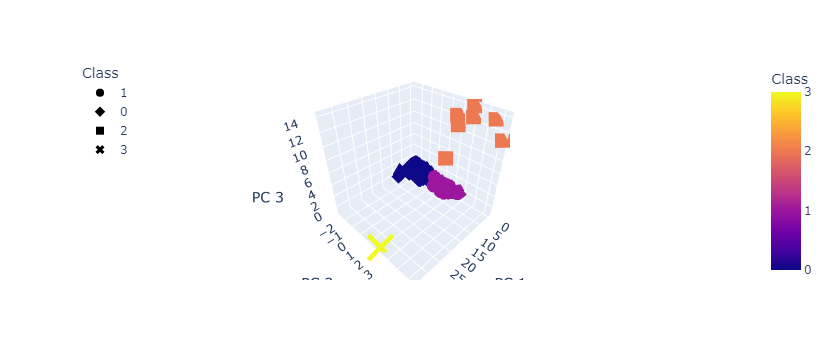

In [174]:
# Creating a 3D-Scatter with the PCA data and the clusters
# https://plotly.com/python-api-reference/generated/plotly.express.scatter_3d.html#plotly-express-scatter-3d
fig = px.scatter_3d(
    clustered_df,
    x="PC 1",
    y="PC 2",
    z="PC 3",
    hover_name = "CoinName",
    hover_data = ["Algorithm"],
    color="Class",
    symbol="Class",
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()


In [180]:
# Create a table with tradable cryptocurrencies.
# https://hvplot.holoviz.org/reference/pandas/table.html
clustered_df.hvplot.table(columns=['CoinName', 'Algorithm', 'ProofType', 'TotalCoinSupply', 'TotalCoinsMined', 'Class'], sortable=True, selectable=True)


:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,Class]

In [189]:
# Print the total number of tradable cryptocurrencies.
n = len(pd.unique(clustered_df['CoinName']))
print("Total number of tradable cryptocurrencies %f" % n)

Total number of tradable cryptocurrencies 532.000000


In [191]:
# Scaling data to create the scatter plot with tradable cryptocurrencies.
# Use the MinMaxScaler().fit_transform method to scale the TotalCoinSupply and TotalCoinsMined columns between the given range of zero and one.
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler.fit_transform
tradable_crypto_scaled = MinMaxScaler().fit_transform(clustered_df[['TotalCoinSupply', 'TotalCoinsMined']])
tradable_crypto_scaled


array([[4.20000000e-11, 5.94229956e-03],
       [5.32000000e-04, 7.00182106e-03],
       [3.14159000e-01, 3.53420580e-02],
       ...,
       [1.40022261e-03, 6.92655067e-03],
       [2.10000000e-05, 5.94962604e-03],
       [1.00000000e-06, 5.94242837e-03]])

In [193]:
# Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.
plot_df = pd.DataFrame(data=tradable_crypto_scaled, columns=["TotalCoinSupply", "TotalCoinsMined"])
plot_df.index = clustered_df.index

# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.
plot_df['CoinName'] = clustered_df['CoinName'] 

# Add the "Class" column from the clustered_df DataFrame to the new DataFrame. 
plot_df['Class'] = clustered_df['Class'] 

plot_df.head(10)

,TotalCoinSupply,TotalCoinsMined,CoinName,Class
42,4.200000e-11,0.005942,42 Coin,1
404,5.320000e-04,0.007002,404Coin,1
1337,3.141590e-01,0.035342,EliteCoin,1
BTC,2.100000e-05,0.005960,Bitcoin,0
ETH,0.000000e+00,0.006050,Ethereum,0
LTC,8.400000e-05,0.006006,Litecoin,0
DASH,2.200000e-05,0.005951,Dash,1
XMR,0.000000e+00,0.005960,Monero,0
ETC,2.100000e-04,0.006056,Ethereum Classic,0
ZEC,2.100000e-05,0.005950,ZCash,0


In [197]:
# Create a hvplot.scatter plot using x="TotalCoinsMined" and y="TotalCoinSupply".
# https://hvplot.holoviz.org/reference/pandas/scatter.html
plot_df.hvplot.scatter(x="TotalCoinsMined", y="TotalCoinSupply", by='Class', hover_cols=["CoinName"])

:NdOverlay   [Class]
   :Scatter   [TotalCoinsMined]   (TotalCoinSupply,CoinName)